In [ ]:
/* A few queries to better understand the data set */
USE tempdb;
GO

SELECT count(*) as number_of_rows FROM [tempdb].[dbo].[day_one];

SELECT 
    count(*) as number_of_groups
FROM [tempdb].[dbo].[day_one]
WHERE [number]  is NULL;

SELECT TOP (100) [Id]
      ,[number]
  FROM [tempdb].[dbo].[day_one];

In [ ]:
/* Total number of calories */
SELECT SUM([number]) as total_calories FROM [tempdb].[dbo].[day_one];

In [ ]:
/* In the data set we have id. we need to find the group boundaries knowing that they end with an empty row (inserted as null.
   The result is the lower and uper boundaries of a group */

USE tempdb;
GO

SELECT 
    LAG([Id], 1) OVER (ORDER BY [Id]) AS PreviousId 
    ,[Id]
    ,[number]
FROM [tempdb].[dbo].[day_one]
WHERE [number]  IS NULL
ORDER BY [Id];

In [108]:
/* test for a single group with manually adding the ids */

USE tempdb;
GO

SELECT 
    SUM([number]) as sum_calories_in_group
FROM [tempdb].[dbo].[day_one]
WHERE [Id] >= 11 AND [Id] <= 13

Commands completed successfully.

Warning: Null value is eliminated by an aggregate or other SET operation.

(1 row affected)

Total execution time: 00:00:00.115

sum_calories_in_group
22990


In [ ]:
/* It is time for some CTEs */

USE tempdb;
GO

/* Define the CTE expression name and column list. */
WITH Groups_CTE (LowerLimit, UpperLimit)
AS
/* Define the CTE query. */
(
    SELECT 
         ISNULL(LAG([Id], 1) OVER (ORDER BY [Id]),1) AS LowerLimit 
        ,[Id] as UpperLimit
    FROM [tempdb].[dbo].[day_one]
    WHERE [number]  IS NULL
)
/* Define the outer query referencing the CTE name. */
SELECT 
     LowerLimit
    ,UpperLimit
    ,(SELECT SUM([number]) FROM [tempdb].[dbo].[day_one] WHERE [Id] >= LowerLimit AND [Id] <= UpperLimit) as Calories_SUM
FROM Groups_CTE ORDER BY LowerLimit

In [120]:
/* the next step is to recude the result set to only one - the max one */

USE tempdb;
GO

/* Define the CTE expression name and column list. */
WITH Groups_CTE (LowerLimit, UpperLimit)
AS
/* Define the CTE query. */
(
    SELECT 
         ISNULL(LAG([Id], 1) OVER (ORDER BY [Id]),1) AS LowerLimit 
        ,[Id] as UpperLimit
    FROM [tempdb].[dbo].[day_one]
    WHERE [number]  IS NULL
)
/* Define the outer query referencing the CTE name. */
SELECT TOP 1
    (SELECT SUM([number]) FROM [tempdb].[dbo].[day_one] WHERE [Id] >= LowerLimit AND [Id] <= UpperLimit) as Calories_SUM
FROM Groups_CTE ORDER BY Calories_SUM DESC

Commands completed successfully.

Warning: Null value is eliminated by an aggregate or other SET operation.

(1 row affected)

Total execution time: 00:00:00.217

Calories_SUM
71506


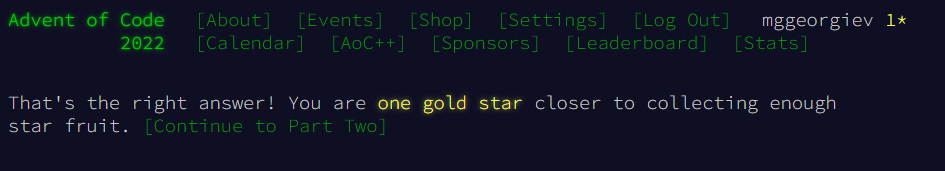

in my set this was indeed the correct answer.

DECLARE @Id INT;
DECLARE @number INT = 0;
 
DECLARE CUR_TEST CURSOR FAST_FORWARD FOR
    SELECT @CursorCaloriesMAX
    FROM   [tempdb].[dbo].[day_one]
    ORDER BY [Id];
 
OPEN CUR_TEST
FETCH NEXT FROM CUR_TEST INTO @Id
 
WHILE @@FETCH_STATUS = 0
BEGIN
   UPDATE dbo.CursorTest 
   SET RunningTotal = @RunningTotal + @CursorTestID
   WHERE CursorTestID = @CursorTestID;

   SET @RunningTotal += @CursorTestID

   FETCH NEXT FROM CUR_TEST INTO @CursorTestID
END
CLOSE CUR_TEST
DEALLOCATE CUR_TEST
GO